In [ ]:
# Scrapbook for linear regression

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'





In [9]:
x_train, y_train = load_data()
print(f'population: {x_train[0:5]}')
print(f'profit: {y_train[0:5]}')

population: [6.1101 5.5277 8.5186 7.0032 5.8598]
profit: [17.592   9.1302 13.662  11.854   6.8233]


In [11]:
print(f'Dimensions of x_train: {x_train.shape}')
print(f'Dimensions of y_train: {y_train.shape}')

Dimensions of x_train: (97,)
Dimensions of y_train: (97,)


In [61]:
def gradient_descent(a=0.01, w=0, b=0, num_iters=1500, x_train=x_train, y_train=y_train):

    """
    Performs gradient descent.  

    Args:
        x_train: (ndarray): Shape (m,)
        y_train: (ndarray): Shape (m,)
        a, w, b: (scalar) initial guesses
        num_iters: (int): number of iterations

    Returns
        step: (ndarray): Shape (m,). Vector with iteration numbers
        cost: (ndarray): Shape (m,). Vector with Cost function updates
        w, b: (scalars): Estimates for weight and bias
        y_est: (ndarray): Shape (m,). Vector with estimates
    """

    tmp_w = 0
    tmp_b = 0
    cost=[]
    step=[]
    m = len(x_train)

    for i in range(num_iters):
        b_est = (w * x_train + b) - y_train
        w_est = np.dot(x_train, b_est)
        j_est = np.square(b_est)
        
        dw = 1/m * np.sum(w_est)
        db = 1/m * np.sum(b_est)
        tmp_j = 1/ (2*m) * np.sum(j_est)
        tmp_w = w - a * dw
        tmp_b = b - a * db
        
        cost.append(tmp_j)
        step.append(i)
        w = tmp_w
        b = tmp_b
        print(f'i={i},w={w:1.3f}, b={b:1.3f}, J={tmp_j:1.3f}')

    y_est = w * x_train + b
    step = np.array(step)
    cost = np.array(cost)

    return step, cost, w, b, y_est

In [70]:
step, cost, w, b, y_est = gradient_descent(a=0.015, w=3, b=3, num_iters=200)


i=0,w=-0.050, b=2.675, J=262.825
i=1,w=0.664, b=2.729, J=22.327
i=2,w=0.499, b=2.694, J=9.210
i=3,w=0.540, b=2.681, J=8.476
i=4,w=0.533, b=2.662, J=8.416
i=5,w=0.536, b=2.644, J=8.392
i=6,w=0.538, b=2.627, J=8.371
i=7,w=0.540, b=2.609, J=8.350
i=8,w=0.541, b=2.591, J=8.329
i=9,w=0.543, b=2.574, J=8.308
i=10,w=0.545, b=2.556, J=8.287
i=11,w=0.547, b=2.539, J=8.267
i=12,w=0.548, b=2.521, J=8.246
i=13,w=0.550, b=2.504, J=8.226
i=14,w=0.552, b=2.487, J=8.206
i=15,w=0.554, b=2.470, J=8.186
i=16,w=0.555, b=2.452, J=8.166
i=17,w=0.557, b=2.435, J=8.146
i=18,w=0.559, b=2.418, J=8.126
i=19,w=0.560, b=2.401, J=8.106
i=20,w=0.562, b=2.384, J=8.087
i=21,w=0.564, b=2.367, J=8.067
i=22,w=0.566, b=2.350, J=8.048
i=23,w=0.567, b=2.333, J=8.028
i=24,w=0.569, b=2.316, J=8.009
i=25,w=0.571, b=2.300, J=7.990
i=26,w=0.572, b=2.283, J=7.971
i=27,w=0.574, b=2.266, J=7.952
i=28,w=0.576, b=2.249, J=7.934
i=29,w=0.577, b=2.233, J=7.915
i=30,w=0.579, b=2.216, J=7.896
i=31,w=0.581, b=2.200, J=7.878
i=32,w=0.582, 

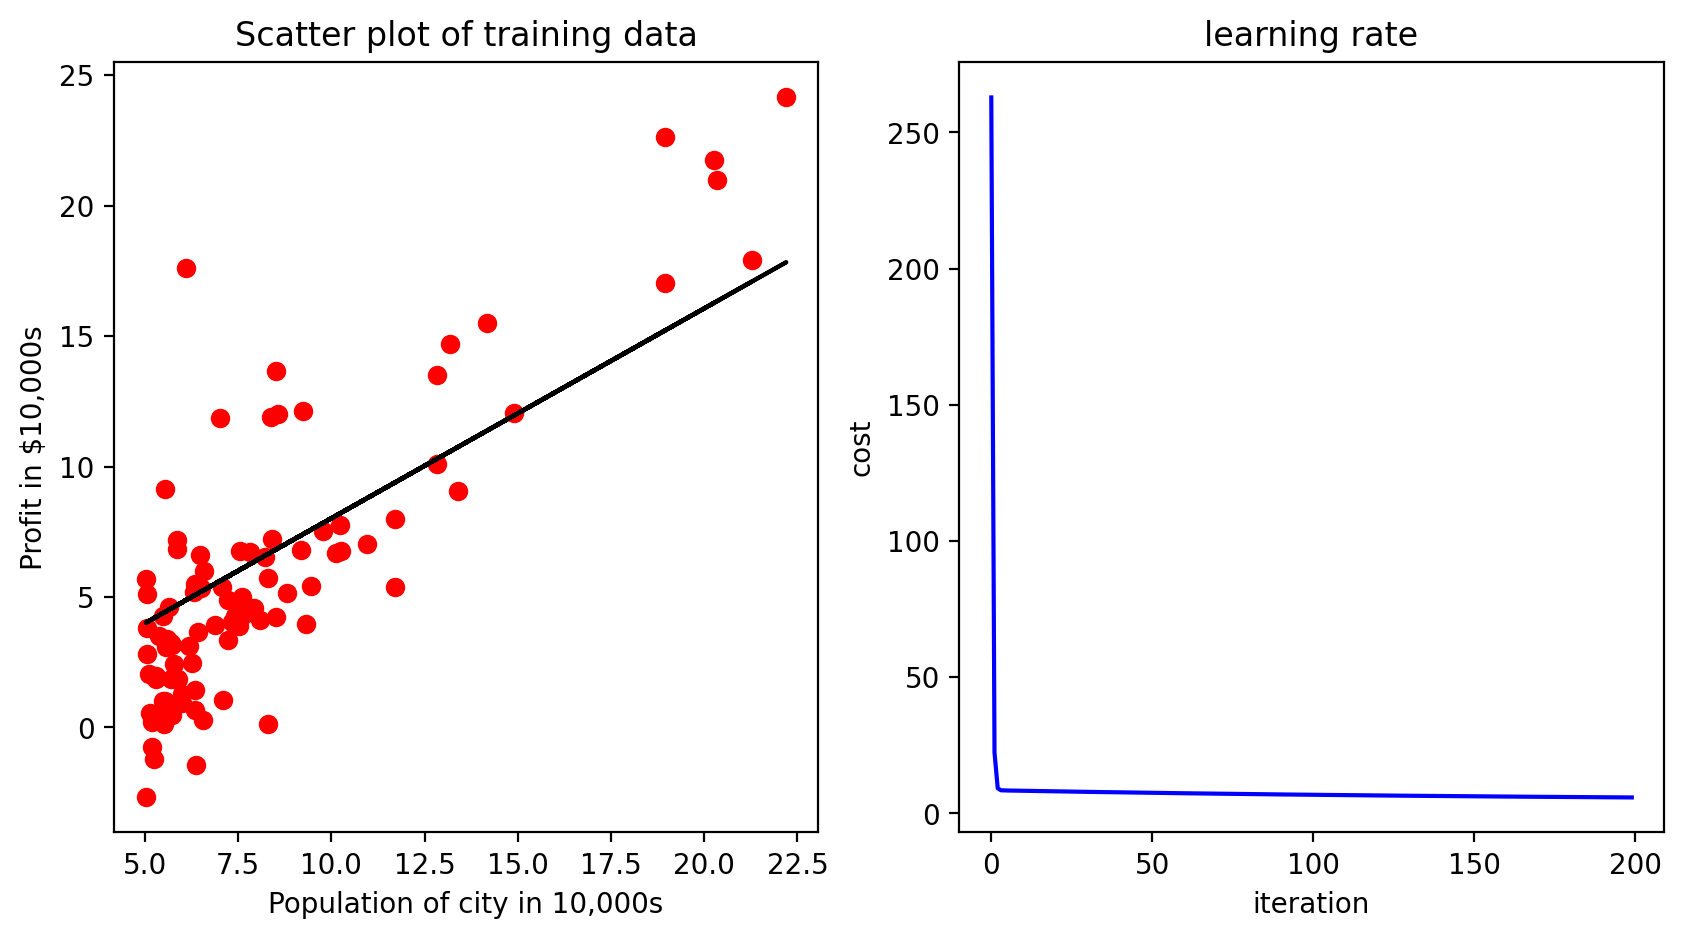

In [71]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(x_train, y_train, color='red')
ax[0].plot(x_train, y_est, color='black')
ax[0].set_title('Scatter plot of training data')
ax[0].set_xlabel('Population of city in 10,000s')
ax[0].set_ylabel('Profit in $10,000s')
ax[1].plot(step, cost, color='blue') 
ax[1].set_title('learning rate')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('cost')
plt.show()